# 0. E.coli 단백질 분석


# 1. 데이터의 출처

http://www.tanpaku.org/tp-esol/download.php?lang=en

```
eSOL(Solubility database of all E.coli proteins) is a database on the solubility of entire ensemble E.coli proteins (Niwa T, Ying BW, Saito K, Jin W, Takada S, Ueda T and Taguchi H, 2009) individually synthesized by PURE system that is chaperone free.
```
# 2. 데이터파일 확인

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('all_data.tab', sep='\t')
df.tail()

,JW_ID,ECK number,B number,Gene name K-12,Locus name K-12,Synonyms of locus names K-12,Solubility(%),Yield(uM),Yield(ug/ml),Minus Sol,...,TF(ug/ml),GroE(ug/ml),KJE(ug/ml),Calculated MW(kDa),Calculated pI,Type of gene product,Gene product description,Cell location,Structure (PDB) id,SCOP assignment
4127,JW4089,ECK4121,b4128,yjdK,yjdK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.4,5.8,o,predicted protein,Cytoplasmic,NaN,NaN
4128,JW4097,ECK4131,b4137,cutA,cutA,cutA1 -!- cycY,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.3,6.1,pf,"copper binding protein, copper sensitivity",Cytoplasmic,NaN,NaN
4129,JW4108,ECK4143,b4411,ecnB,ecnB,ygeU -!- yjeU,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.8,9.4,lp,entericidin B membrane lipoprotein,Outer Membrane Lipoprotein,NaN,NaN
4130,JW5738,ECK4144,b4148,sugE,sugE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.9,10.7,t,multidrug efflux system protein,Integral Membrane Protein,NaN,NaN
4131,JW5750,ECK4220,b4224,chpS,chpS,chpBI -!- yjfA -!- yjfB,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.3,6.7,f,antitoxin of the ChpB-ChpS toxin-antitoxin system,Cytoplasmic,NaN,NaN


데이터에 대한 기술 통계를 확인

In [3]:
df.describe()

,Solubility(%),Yield(uM),Yield(ug/ml),Minus Sol,TF Sol,GroE Sol,KJE Sol,Minus(uM),TF(uM),GroE(uM),KJE(uM),Minus(ug/ml),TF(ug/ml),GroE(ug/ml),KJE(ug/ml),Calculated MW(kDa),Calculated pI
count,3173.000000,3173.000000,3173.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,4132.000000,4132.000000
mean,48.915853,1.207312,32.540498,16.239404,29.406497,58.527513,67.312893,1.575291,1.483292,1.692758,1.599188,48.972906,46.415850,52.898020,50.170990,35.039906,7.573149
std,33.392043,1.094200,25.582742,10.900939,18.205217,24.152246,26.747959,1.423742,1.302805,1.479137,1.468802,35.254492,31.529234,36.579204,36.504731,22.888830,1.788874
min,0.000000,0.000000,2.000000,1.110000,2.100000,6.190000,3.930000,0.024000,0.031000,0.007000,0.022000,2.070000,2.140000,0.580000,1.570000,1.700000,3.800000
25%,18.000000,0.500000,15.000000,8.857500,17.502500,40.972500,49.147500,0.654750,0.631000,0.708500,0.677500,25.260000,24.907500,28.710000,26.345000,18.900000,6.190000
50%,43.000000,0.900000,26.000000,13.820000,25.530000,59.210000,69.040000,1.179500,1.157500,1.284500,1.202500,41.385000,40.200000,44.190000,41.535000,30.976000,7.070000
75%,79.000000,1.600000,44.000000,21.220000,36.572500,76.150000,85.580000,2.075250,1.955000,2.232750,2.051250,62.630000,58.830000,68.577500,61.640000,45.118500,9.100000
max,147.000000,15.800000,363.000000,84.840000,122.640000,126.250000,143.840000,12.506000,11.645000,14.164000,14.798000,272.220000,251.490000,240.780000,311.180000,249.200000,13.100000


사용할 열은 Solubility(%), Yield(uM), Calculated MW(kDa), Calculated pI를 사용한다.	

# 3. 시각화하기

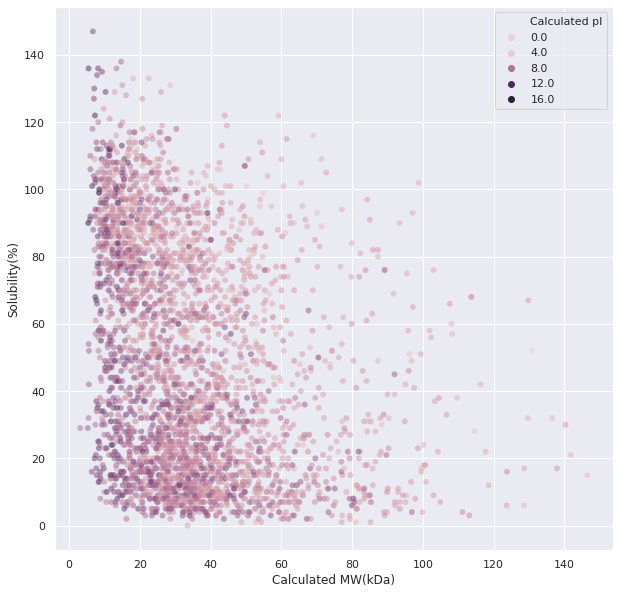

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plt.plot(df['Solubility(%)'])
sns.set(rc={'figure.figsize':(10,10)})

sns.scatterplot(y='Solubility(%)',
                x="Calculated MW(kDa)",
                hue="Calculated pI",
                linewidth=0.1,
                alpha=0.5,
                sizes=(1,8),
                data=df)

단백질 사이즈가 작을 수록 solubility가 높기는 하다. 

## 3.2. Kernel density estimation

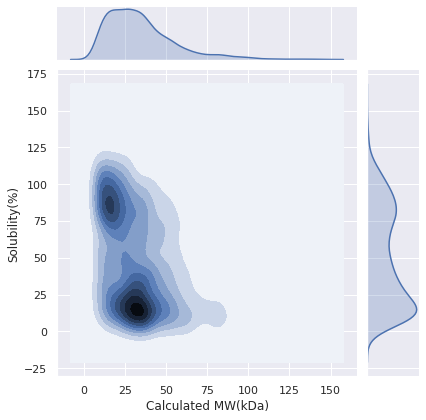

In [5]:
sns.jointplot(x="Calculated MW(kDa)", y="Solubility(%)", data=df, kind="kde")

필요한 정보로만 구성된 `dataframe`을 새로 만든다.

In [6]:
df_sub = df[['Solubility(%)', 'Calculated MW(kDa)','Calculated pI']]
# df_sub = df.iloc[:,0:2]
df_sub.head()

,Solubility(%),Calculated MW(kDa),Calculated pI
0,32.0,33.600,6.20
1,18.0,47.056,5.71
2,78.0,11.400,10.90
3,7.0,29.555,8.74
4,85.0,35.200,5.80


## 3.3. PairGrid 시각화

/home/partrita/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/partrita/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


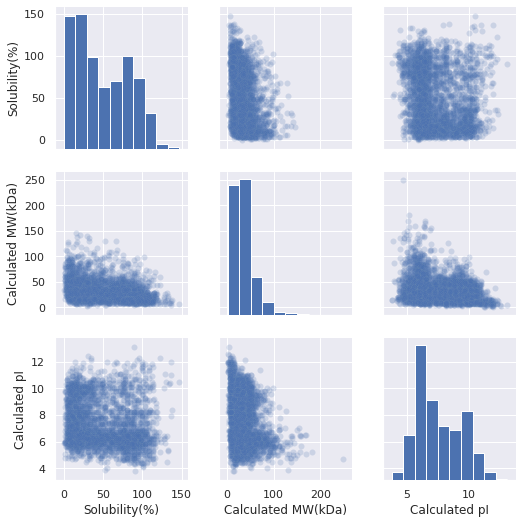

In [7]:
sns.pairplot(df_sub, plot_kws={'alpha':0.2, 'linewidth':0.1})

/home/partrita/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/partrita/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/partrita/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/partrita/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/partrita/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encounte

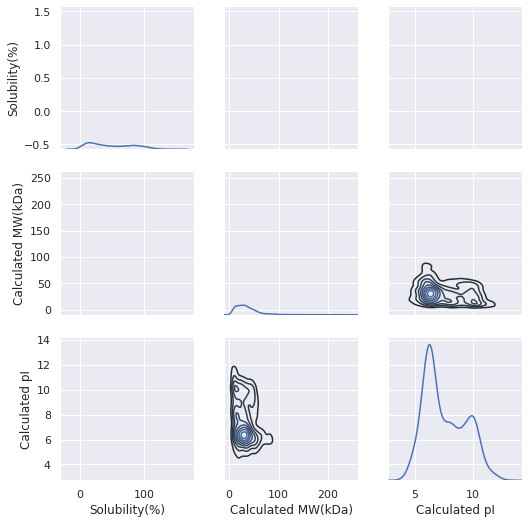

In [8]:
g = sns.PairGrid(df_sub)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=10)

In [11]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

X = ProteinAnalysis("MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGT"
                    "RDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEEC"
                    "LFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILF"
                    "LPLPV")

X.molecular_weight()

17103.1617

In [12]:
X.aromaticity()

0.09868421052631579

In [13]:
X.instability_index()

41.980263157894726

In [14]:
X.isoelectric_point()

7.72247314453125

In [15]:
sec_struc = X.secondary_structure_fraction()
sec_struc[0] # helix

0.28289473684210525

In [16]:
sec_struc[1] # turn

0.256578947368421

In [17]:
sec_struc[2] # sheet

0.25

In [19]:
epsilon_prot = X.molar_extinction_coefficient()
epsilon_prot[0]  # with reduced cysteines

17420

In [20]:
epsilon_prot[1]  # with disulfide bridges

17545

In [21]:
X.gravy()

-0.597368421052632

In [26]:
import numpy as np
np.mean(X.flexibility())

1.0058031968031966

In [23]:
X.instability_index()

41.980263157894726

In [24]:
X.get_amino_acids_percent()

{'A': 0.039473684210526314,
 'C': 0.019736842105263157,
 'D': 0.03289473684210526,
 'E': 0.07894736842105263,
 'F': 0.039473684210526314,
 'G': 0.09210526315789473,
 'H': 0.03289473684210526,
 'I': 0.03289473684210526,
 'K': 0.07894736842105263,
 'L': 0.11842105263157894,
 'M': 0.013157894736842105,
 'N': 0.046052631578947366,
 'P': 0.05263157894736842,
 'Q': 0.039473684210526314,
 'R': 0.039473684210526314,
 'S': 0.06578947368421052,
 'T': 0.08552631578947369,
 'V': 0.03289473684210526,
 'W': 0.006578947368421052,
 'Y': 0.05263157894736842}